In [37]:
import pandas as pd
import seaborn as sns
from datetime import datetime

In [38]:
bh = pd.read_csv('datasets/barts_hotspots.csv')
dow_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# bh_df['Date'] = bh_df['Date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y'))
bh['dow'] = bh['Date'].apply(lambda x : dow_index[datetime.strptime(x, '%m/%d/%Y').weekday()])
bh
bh
# bart stations to hotspots and vice versa

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
0,06/09/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
1,04/28/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,NaN,NaN,...,654.0,524.0,817.0,608.0,492.0,753.0,NaN,NaN,NaN,Sunday
2,05/18/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,NaN,NaN,...,791.0,590.0,1061.0,569.0,406.0,797.0,NaN,NaN,NaN,Saturday
3,04/18/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,528.0,398.0,702.0,442.0,321.0,608.0,363.0,297.0,443.0,Thursday
4,04/08/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,429.0,339.0,542.0,502.0,354.0,711.0,NaN,NaN,NaN,Monday
5,06/30/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",616.0,385.0,987.0,NaN,NaN,...,NaN,NaN,NaN,386.0,276.0,541.0,NaN,NaN,NaN,Sunday
6,04/23/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",682.0,500.0,931.0,NaN,NaN,...,756.0,577.0,991.0,550.0,406.0,745.0,NaN,NaN,NaN,Tuesday
7,05/13/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",634.0,457.0,878.0,NaN,NaN,...,584.0,470.0,726.0,611.0,424.0,880.0,NaN,NaN,NaN,Monday
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,732.0,586.0,915.0,795.0,612.0,1032.0,568.0,438.0,736.0,Wednesday
9,04/14/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",996.0,853.0,1164.0,NaN,NaN,...,1063.0,928.0,1219.0,NaN,NaN,NaN,NaN,NaN,NaN,Sunday


In [39]:
ba = pd.read_csv('datasets/barts_to_all.csv')
ba
# bart station to all places

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,3603,"Embarcadero, San Francisco, CA",1987,709716 (1987),"4/1/2019 - 6/30/2019, Every day, Daily Average",3373,2479,4589
1,3603,"Embarcadero, San Francisco, CA",1994,910502 (1994),"4/1/2019 - 6/30/2019, Every day, Daily Average",2888,2486,3353
2,3603,"Embarcadero, San Francisco, CA",2020,609301 (2020),"4/1/2019 - 6/30/2019, Every day, Daily Average",3015,2173,4182
3,3603,"Embarcadero, San Francisco, CA",2044,609270 (2044),"4/1/2019 - 6/30/2019, Every day, Daily Average",3019,2156,4226
4,3603,"Embarcadero, San Francisco, CA",2054,609261 (2054),"4/1/2019 - 6/30/2019, Every day, Daily Average",2916,2079,4089
5,3603,"Embarcadero, San Francisco, CA",2074,609250 (2074),"4/1/2019 - 6/30/2019, Every day, Daily Average",2842,2016,4005
6,3603,"Embarcadero, San Francisco, CA",2076,609263 (2076),"4/1/2019 - 6/30/2019, Every day, Daily Average",2869,2050,4014
7,3603,"Embarcadero, San Francisco, CA",2081,609241 (2081),"4/1/2019 - 6/30/2019, Every day, Daily Average",2877,2045,4047
8,3603,"Embarcadero, San Francisco, CA",2092,609242 (2092),"4/1/2019 - 6/30/2019, Every day, Daily Average",2860,2030,4027
9,3603,"Embarcadero, San Francisco, CA",2113,910512 (2113),"4/1/2019 - 6/30/2019, Every day, Daily Average",2737,2361,3172


In [40]:
ha = pd.read_csv('datasets/hotspots_to_all.csv')
ha
#hotspot area to all places 

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,3394,"Fisherman's Wharf, San Francisco, CA",1608,709746 (1608),"4/1/2019 - 6/30/2019, Every day, Daily Average",4030,3244,5005
1,3394,"Fisherman's Wharf, San Francisco, CA",1803,809911 (1803),"4/1/2019 - 6/30/2019, Every day, Daily Average",3782,3110,4599
2,3394,"Fisherman's Wharf, San Francisco, CA",1845,910670 (1845),"4/1/2019 - 6/30/2019, Every day, Daily Average",2412,2133,2726
3,3394,"Fisherman's Wharf, San Francisco, CA",1864,709739 (1864),"4/1/2019 - 6/30/2019, Every day, Daily Average",4453,3546,5590
4,3394,"Fisherman's Wharf, San Francisco, CA",1866,809914 (1866),"4/1/2019 - 6/30/2019, Every day, Daily Average",3592,2884,4472
5,3394,"Fisherman's Wharf, San Francisco, CA",1883,809915 (1883),"4/1/2019 - 6/30/2019, Every day, Daily Average",3749,3056,4598
6,3394,"Fisherman's Wharf, San Francisco, CA",1894,809913 (1894),"4/1/2019 - 6/30/2019, Every day, Daily Average",3525,2866,4335
7,3394,"Fisherman's Wharf, San Francisco, CA",1916,709744 (1916),"4/1/2019 - 6/30/2019, Every day, Daily Average",4061,3290,5012
8,3394,"Fisherman's Wharf, San Francisco, CA",1933,809912 (1933),"4/1/2019 - 6/30/2019, Every day, Daily Average",3300,2625,4148
9,3394,"Fisherman's Wharf, San Francisco, CA",1940,809917 (1940),"4/1/2019 - 6/30/2019, Every day, Daily Average",3456,2737,4362


In [41]:
h1 = pd.read_csv('datasets/hours_q1.csv')
h1

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3768,3700,3,161.58,87.83,147.02,1.49
1,3772,3660,3,373.98,217.24,328.16,1.65
2,3751,3708,6,1197.27,259.18,1171.36,1.23
3,3761,3608,6,588.32,223.30,557.92,1.36
4,3767,3724,17,438.98,235.70,395.22,1.55
5,3778,3614,17,1771.23,439.96,1717.16,1.28
6,3769,3704,17,511.86,270.83,460.53,1.55
7,3775,3644,17,544.15,228.36,513.53,1.37
8,3772,3674,17,963.83,504.70,858.42,1.61
9,3779,3604,17,501.38,176.70,478.24,1.35


In [42]:
h1 = pd.read_csv('datasets/hours_q2.csv')
h1

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3709,3671,13,875.06,232.37,850.74,1.25
1,3708,3681,13,850.12,224.94,826.64,1.25
2,3632,3715,8,1017.34,298.82,973.40,1.35
3,3642,3615,8,94.17,75.18,71.61,2.17
4,3643,3605,8,171.74,205.52,112.04,2.41
5,3633,3705,8,1037.53,395.25,969.60,1.44
6,3641,3625,8,829.87,219.15,805.31,1.27
7,3640,3635,8,1955.09,1595.53,1639.58,1.70
8,3647,3722,15,503.34,325.88,461.24,1.45
9,3644,3752,15,869.55,273.24,830.42,1.35


In [43]:
#TAZ traffic analysis zone
#For every Hotspot, recommend the appropriate BART station to get off of in order to **minimize travel time**.

In [44]:
ha

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Date Range,Mean Travel Time (Seconds),Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,3394,"Fisherman's Wharf, San Francisco, CA",1608,709746 (1608),"4/1/2019 - 6/30/2019, Every day, Daily Average",4030,3244,5005
1,3394,"Fisherman's Wharf, San Francisco, CA",1803,809911 (1803),"4/1/2019 - 6/30/2019, Every day, Daily Average",3782,3110,4599
2,3394,"Fisherman's Wharf, San Francisco, CA",1845,910670 (1845),"4/1/2019 - 6/30/2019, Every day, Daily Average",2412,2133,2726
3,3394,"Fisherman's Wharf, San Francisco, CA",1864,709739 (1864),"4/1/2019 - 6/30/2019, Every day, Daily Average",4453,3546,5590
4,3394,"Fisherman's Wharf, San Francisco, CA",1866,809914 (1866),"4/1/2019 - 6/30/2019, Every day, Daily Average",3592,2884,4472
5,3394,"Fisherman's Wharf, San Francisco, CA",1883,809915 (1883),"4/1/2019 - 6/30/2019, Every day, Daily Average",3749,3056,4598
6,3394,"Fisherman's Wharf, San Francisco, CA",1894,809913 (1894),"4/1/2019 - 6/30/2019, Every day, Daily Average",3525,2866,4335
7,3394,"Fisherman's Wharf, San Francisco, CA",1916,709744 (1916),"4/1/2019 - 6/30/2019, Every day, Daily Average",4061,3290,5012
8,3394,"Fisherman's Wharf, San Francisco, CA",1933,809912 (1933),"4/1/2019 - 6/30/2019, Every day, Daily Average",3300,2625,4148
9,3394,"Fisherman's Wharf, San Francisco, CA",1940,809917 (1940),"4/1/2019 - 6/30/2019, Every day, Daily Average",3456,2737,4362


In [45]:
#Step1:ha
hotposts = ha['Origin Movement ID'].unique()

In [46]:
barts = ba['Origin Movement ID'].unique()

In [47]:
ba['Origin Display Name'].unique()

array(['Embarcadero, San Francisco, CA',
       '2nd Street and Stevenson Street (Montgomery BART, San Francisco, CA',
       'Powell BART Station, Market St and Powell St, San Francisco, CA'],
      dtype=object)

In [48]:
bh['Origin Movement ID'].unique()

array([3396, 3603, 3792, 3394, 3692, 3760], dtype=int64)

In [49]:
bh['Destination Movement ID'].unique()

array([3603, 3394, 3396, 3792, 3692, 3760], dtype=int64)

In [50]:
ha['Destination Display Name'].unique()

array(['709746 (1608)', '809911 (1803)', '910670 (1845)', ...,
       '304104 (6506)', '303590 (6887)', '910853 (2817)'], dtype=object)

In [51]:
bh_hotspots_3394 = bh[(bh['Origin Movement ID'] == 3394)|(bh['Destination Movement ID'] == 3394)]
bh_hotspots_3394

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
1,04/28/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,NaN,NaN,...,654.0,524.0,817.0,608.0,492.0,753.0,NaN,NaN,NaN,Sunday
2,05/18/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,NaN,NaN,...,791.0,590.0,1061.0,569.0,406.0,797.0,NaN,NaN,NaN,Saturday
6,04/23/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",682.0,500.0,931.0,NaN,NaN,...,756.0,577.0,991.0,550.0,406.0,745.0,NaN,NaN,NaN,Tuesday
7,05/13/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",634.0,457.0,878.0,NaN,NaN,...,584.0,470.0,726.0,611.0,424.0,880.0,NaN,NaN,NaN,Monday
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,732.0,586.0,915.0,795.0,612.0,1032.0,568.0,438.0,736.0,Wednesday
10,06/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,NaN,...,713.0,511.0,996.0,750.0,549.0,1025.0,NaN,NaN,NaN,Saturday
13,05/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,594.0,...,633.0,488.0,820.0,625.0,484.0,807.0,NaN,NaN,NaN,Wednesday
19,05/07/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,643.0,...,800.0,633.0,1012.0,715.0,537.0,952.0,NaN,NaN,NaN,Tuesday
22,05/11/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",670.0,509.0,881.0,601.0,509.0,...,736.0,557.0,973.0,540.0,424.0,688.0,NaN,NaN,NaN,Saturday
23,04/25/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",727.0,541.0,976.0,824.0,606.0,...,727.0,549.0,963.0,571.0,461.0,708.0,NaN,NaN,NaN,Thursday


In [52]:
bh_hotspots_3792 = bh[(bh['Origin Movement ID'] == 3792)|(bh['Destination Movement ID'] == 3792)]
bh_hotspots_3792

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
3,04/18/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,528.0,398.0,702.0,442.0,321.0,608.0,363.0,297.0,443.0,Thursday
4,04/08/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,429.0,339.0,542.0,502.0,354.0,711.0,NaN,NaN,NaN,Monday
5,06/30/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",616.0,385.0,987.0,NaN,NaN,...,NaN,NaN,NaN,386.0,276.0,541.0,NaN,NaN,NaN,Sunday
11,04/18/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",591.0,417.0,837.0,650.0,462.0,...,614.0,456.0,828.0,496.0,357.0,688.0,417.0,331.0,525.0,Thursday
12,06/11/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",643.0,451.0,916.0,814.0,646.0,...,595.0,433.0,816.0,463.0,366.0,585.0,449.0,371.0,542.0,Tuesday
14,04/21/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",469.0,332.0,664.0,480.0,380.0,...,501.0,332.0,757.0,455.0,339.0,611.0,410.0,301.0,558.0,Sunday
17,05/16/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",605.0,434.0,842.0,609.0,469.0,...,657.0,501.0,861.0,496.0,368.0,669.0,408.0,312.0,533.0,Thursday
20,05/01/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",527.0,394.0,704.0,639.0,472.0,...,500.0,383.0,651.0,473.0,383.0,583.0,NaN,NaN,NaN,Wednesday
21,04/27/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",510.0,359.0,724.0,489.0,376.0,...,561.0,392.0,804.0,480.0,335.0,688.0,381.0,324.0,449.0,Saturday
24,05/26/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",449.0,325.0,621.0,NaN,NaN,...,486.0,346.0,682.0,444.0,327.0,602.0,NaN,NaN,NaN,Sunday


In [53]:
bh_hotspots_3396 = bh[(bh['Origin Movement ID'] == 3396)|(bh['Destination Movement ID'] == 3396)]
bh_hotspots_3396

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
0,06/09/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
9,04/14/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",996.0,853.0,1164.0,NaN,NaN,...,1063.0,928.0,1219.0,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
15,06/06/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1363.0,1166.0,1595.0,1327.0,1164.0,...,1370.0,1151.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
16,04/18/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1313.0,964.0,1789.0,1489.0,1051.0,...,1393.0,1123.0,1727.0,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
18,06/11/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1438.0,1060.0,1951.0,1259.0,1102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
29,05/30/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1112.0,768.0,1608.0,845.0,474.0,...,1191.0,1000.0,1419.0,970.0,793.0,1188.0,NaN,NaN,NaN,Thursday
30,05/03/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1214.0,990.0,1488.0,1152.0,962.0,...,1187.0,985.0,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,Friday
32,06/03/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1220.0,1011.0,1473.0,NaN,NaN,...,1195.0,1040.0,1373.0,NaN,NaN,NaN,NaN,NaN,NaN,Monday
35,05/27/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1066.0,901.0,1262.0,NaN,NaN,...,1115.0,977.0,1272.0,NaN,NaN,NaN,NaN,NaN,NaN,Monday
39,04/21/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1331.0,1094.0,1619.0,NaN,NaN,...,1333.0,1058.0,1679.0,NaN,NaN,NaN,NaN,NaN,NaN,Sunday


In [54]:
bh_hotspots_3396['Daily Mean Travel Time (Minutes)'] = bh_hotspots_3396['Daily Mean Travel Time (Seconds)']/60
bh_hotspots_3396['AM Mean Travel Time (Minutes)'] = bh_hotspots_3396['AM Mean Travel Time (Seconds)']/60
bh_hotspots_3396['PM Mean Travel Time (Minutes)'] = bh_hotspots_3396['PM Mean Travel Time (Seconds)']/60
bh_hotspots_3396['Midday Mean Travel Time (Minutes)'] = bh_hotspots_3396['Midday Mean Travel Time (Seconds)']/60
bh_hotspots_3396['Evening Mean Travel Time (Minutes)'] = bh_hotspots_3396['Evening Mean Travel Time (Seconds)']/60
bh_hotspots_3396['Early Morning Mean Travel Time (Minutes)'] = bh_hotspots_3396['Early Morning Mean Travel Time (Seconds)']/60

C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

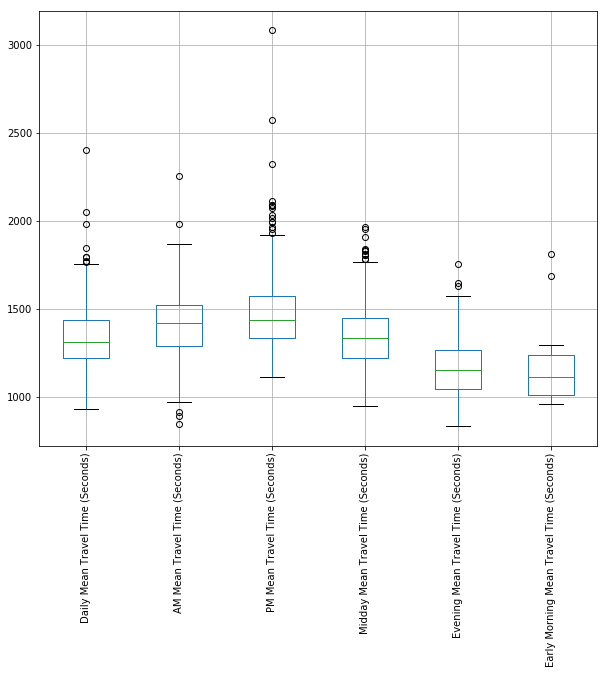

In [55]:
a = bh_hotspots_3396.boxplot(column=['Daily Mean Travel Time (Seconds)',
       #'Daily Range - Lower Bound Travel Time (Seconds)',
       #'Daily Range - Upper Bound Travel Time (Seconds)',
       'AM Mean Travel Time (Seconds)',
       #'AM Range - Lower Bound Travel Time (Seconds)',
       #'AM Range - Upper Bound Travel Time (Seconds)',
       'PM Mean Travel Time (Seconds)',
       #'PM Range - Lower Bound Travel Time (Seconds)',
       #'PM Range - Upper Bound Travel Time (Seconds)',
       'Midday Mean Travel Time (Seconds)',
       #'Midday Range - Lower Bound Travel Time (Seconds)',
       #'Midday Range - Upper Bound Travel Time (Seconds)',
       'Evening Mean Travel Time (Seconds)',
       #'Evening Range - Lower Bound Travel Time (Seconds)',
       #'Evening Range - Upper Bound Travel Time (Seconds)',
       'Early Morning Mean Travel Time (Seconds)',
       #'Early Morning Range - Lower Bound Travel Time (Seconds)',
       #'Early Morning Range - Upper Bound Travel Time (Seconds)']
                                    ],figsize = (10,8),rot=90)
# we looked at data for each timeframe 

In [56]:
def barts_hopspot_time_match(h1_TAZ, TAZ):
    #h1_TAZ = h1[(h1['Destination Movement ID'] == TAZ)|(h1['Origin Movement ID'] == TAZ)]
    #h1[h1['Origin Movement ID'] != TAZ]
    b =h1_TAZ[h1_TAZ['Destination Movement ID'] == TAZ]
    a = h1_TAZ[h1_TAZ['Destination Movement ID'] != TAZ]
    display(a)
    display(b)
    b['Destination Movement ID'] = b['Origin Movement ID']
    b['Origin Movement ID'] = [TAZ]*len(b)
    c = pd.concat([a,b],join = 'outer',axis = 0)
    return c


In [57]:
bh_hotspots_3396 = barts_hopspot_time_match(bh_hotspots_3396, 3396)
bh_hotspots_3396

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow,Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
0,06/09/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,Sunday,26.466667,NaN,NaN,NaN,NaN,NaN
15,06/06/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1363.0,1166.0,1595.0,1327.0,1164.0,...,NaN,NaN,NaN,Thursday,22.716667,22.116667,25.450000,22.833333,NaN,NaN
16,04/18/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1313.0,964.0,1789.0,1489.0,1051.0,...,NaN,NaN,NaN,Thursday,21.883333,24.816667,NaN,23.216667,NaN,NaN
18,06/11/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1438.0,1060.0,1951.0,1259.0,1102.0,...,NaN,NaN,NaN,Tuesday,23.966667,20.983333,30.616667,NaN,NaN,NaN
30,05/03/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1214.0,990.0,1488.0,1152.0,962.0,...,NaN,NaN,NaN,Friday,20.233333,19.200000,22.733333,19.783333,NaN,NaN
42,04/12/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1216.0,997.0,1483.0,1220.0,939.0,...,NaN,NaN,NaN,Friday,20.266667,20.333333,NaN,NaN,NaN,NaN
51,04/01/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1391.0,1097.0,1763.0,1483.0,1344.0,...,NaN,NaN,NaN,Monday,23.183333,24.716667,NaN,NaN,NaN,NaN
53,06/07/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1210.0,980.0,1493.0,1182.0,931.0,...,NaN,NaN,NaN,Friday,20.166667,19.700000,NaN,19.383333,NaN,NaN
58,05/13/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1662.0,1032.0,2677.0,1444.0,1090.0,...,NaN,NaN,NaN,Monday,27.700000,24.066667,NaN,NaN,NaN,NaN
63,05/26/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Sunday,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow,Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
9,04/14/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",996.0,853.0,1164.0,NaN,NaN,...,NaN,NaN,NaN,Sunday,16.600000,NaN,NaN,17.716667,NaN,NaN
29,05/30/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1112.0,768.0,1608.0,845.0,474.0,...,NaN,NaN,NaN,Thursday,18.533333,14.083333,23.116667,19.850000,16.166667,NaN
32,06/03/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1220.0,1011.0,1473.0,NaN,NaN,...,NaN,NaN,NaN,Monday,20.333333,NaN,20.766667,19.916667,NaN,NaN
35,05/27/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1066.0,901.0,1262.0,NaN,NaN,...,NaN,NaN,NaN,Monday,17.766667,NaN,NaN,18.583333,NaN,NaN
39,04/21/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1331.0,1094.0,1619.0,NaN,NaN,...,NaN,NaN,NaN,Sunday,22.183333,NaN,NaN,22.216667,NaN,NaN
41,04/13/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1143.0,954.0,1370.0,NaN,NaN,...,NaN,NaN,NaN,Saturday,19.050000,NaN,NaN,20.216667,NaN,NaN
47,05/02/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1144.0,894.0,1465.0,NaN,NaN,...,NaN,NaN,NaN,Thursday,19.066667,NaN,22.616667,NaN,15.033333,NaN
48,06/10/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1155.0,940.0,1420.0,NaN,NaN,...,NaN,NaN,NaN,Monday,19.250000,NaN,21.716667,20.066667,17.150000,NaN
50,06/17/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1106.0,867.0,1411.0,NaN,NaN,...,NaN,NaN,NaN,Monday,18.433333,NaN,21.150000,20.083333,14.550000,NaN
61,05/03/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1209.0,966.0,1513.0,NaN,NaN,...,NaN,NaN,NaN,Friday,20.150000,NaN,22.550000,19.933333,NaN,NaN


C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow,Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
0,06/09/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,Sunday,26.466667,NaN,NaN,NaN,NaN,NaN
15,06/06/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1363.0,1166.0,1595.0,1327.0,1164.0,...,NaN,NaN,NaN,Thursday,22.716667,22.116667,25.450000,22.833333,NaN,NaN
16,04/18/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1313.0,964.0,1789.0,1489.0,1051.0,...,NaN,NaN,NaN,Thursday,21.883333,24.816667,NaN,23.216667,NaN,NaN
18,06/11/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1438.0,1060.0,1951.0,1259.0,1102.0,...,NaN,NaN,NaN,Tuesday,23.966667,20.983333,30.616667,NaN,NaN,NaN
30,05/03/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1214.0,990.0,1488.0,1152.0,962.0,...,NaN,NaN,NaN,Friday,20.233333,19.200000,22.733333,19.783333,NaN,NaN
42,04/12/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1216.0,997.0,1483.0,1220.0,939.0,...,NaN,NaN,NaN,Friday,20.266667,20.333333,NaN,NaN,NaN,NaN
51,04/01/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1391.0,1097.0,1763.0,1483.0,1344.0,...,NaN,NaN,NaN,Monday,23.183333,24.716667,NaN,NaN,NaN,NaN
53,06/07/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1210.0,980.0,1493.0,1182.0,931.0,...,NaN,NaN,NaN,Friday,20.166667,19.700000,NaN,19.383333,NaN,NaN
58,05/13/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1662.0,1032.0,2677.0,1444.0,1090.0,...,NaN,NaN,NaN,Monday,27.700000,24.066667,NaN,NaN,NaN,NaN
63,05/26/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Sunday,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
bh_hotspots_3396 = barts_hopspot_time_match(bh_hotspots_3396, 3396)
#bh_hotspots_3396_3692 = barts_hopspot_time_match(bh_hotspots_3396, 3692)
#bh_hotspots_3396_3760 = barts_hopspot_time_match(bh_hotspots_3396, 3760)
bh_hotspots_3792 = barts_hopspot_time_match(bh_hotspots_3792, 3792)
#bh_hotspots_3792_3692 = barts_hopspot_time_match(bh_hotspots_3792, 3692)
#bh_hotspots_3792_3760 = barts_hopspot_time_match(bh_hotspots_3792, 3760)
bh_hotspots_3394 = barts_hopspot_time_match(bh_hotspots_3394, 3394)
#bh_hotspots_3394_3692 = barts_hopspot_time_match(bh_hotspots_3394, 3692)
#bh_hotspots_3394_3760 = barts_hopspot_time_match(bh_hotspots_3394, 3760)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow,Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
0,06/09/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,Sunday,26.466667,NaN,NaN,NaN,NaN,NaN
15,06/06/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1363.0,1166.0,1595.0,1327.0,1164.0,...,NaN,NaN,NaN,Thursday,22.716667,22.116667,25.450000,22.833333,NaN,NaN
16,04/18/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1313.0,964.0,1789.0,1489.0,1051.0,...,NaN,NaN,NaN,Thursday,21.883333,24.816667,NaN,23.216667,NaN,NaN
18,06/11/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1438.0,1060.0,1951.0,1259.0,1102.0,...,NaN,NaN,NaN,Tuesday,23.966667,20.983333,30.616667,NaN,NaN,NaN
30,05/03/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1214.0,990.0,1488.0,1152.0,962.0,...,NaN,NaN,NaN,Friday,20.233333,19.200000,22.733333,19.783333,NaN,NaN
42,04/12/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1216.0,997.0,1483.0,1220.0,939.0,...,NaN,NaN,NaN,Friday,20.266667,20.333333,NaN,NaN,NaN,NaN
51,04/01/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1391.0,1097.0,1763.0,1483.0,1344.0,...,NaN,NaN,NaN,Monday,23.183333,24.716667,NaN,NaN,NaN,NaN
53,06/07/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1210.0,980.0,1493.0,1182.0,931.0,...,NaN,NaN,NaN,Friday,20.166667,19.700000,NaN,19.383333,NaN,NaN
58,05/13/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1662.0,1032.0,2677.0,1444.0,1090.0,...,NaN,NaN,NaN,Monday,27.700000,24.066667,NaN,NaN,NaN,NaN
63,05/26/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Sunday,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow,Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
3,04/18/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,528.0,398.0,702.0,442.0,321.0,608.0,363.0,297.0,443.0,Thursday
4,04/08/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,429.0,339.0,542.0,502.0,354.0,711.0,NaN,NaN,NaN,Monday
5,06/30/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",616.0,385.0,987.0,NaN,NaN,...,NaN,NaN,NaN,386.0,276.0,541.0,NaN,NaN,NaN,Sunday
12,06/11/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",643.0,451.0,916.0,814.0,646.0,...,595.0,433.0,816.0,463.0,366.0,585.0,449.0,371.0,542.0,Tuesday
20,05/01/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",527.0,394.0,704.0,639.0,472.0,...,500.0,383.0,651.0,473.0,383.0,583.0,NaN,NaN,NaN,Wednesday
24,05/26/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",449.0,325.0,621.0,NaN,NaN,...,486.0,346.0,682.0,444.0,327.0,602.0,NaN,NaN,NaN,Sunday
33,06/26/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",585.0,396.0,865.0,703.0,460.0,...,623.0,402.0,966.0,389.0,325.0,466.0,NaN,NaN,NaN,Wednesday
34,06/28/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",597.0,433.0,822.0,598.0,465.0,...,622.0,456.0,848.0,530.0,379.0,741.0,362.0,320.0,408.0,Friday
38,05/28/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",547.0,391.0,764.0,708.0,522.0,...,461.0,362.0,587.0,510.0,361.0,721.0,NaN,NaN,NaN,Tuesday
57,06/15/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",463.0,337.0,637.0,340.0,287.0,...,440.0,344.0,563.0,369.0,284.0,478.0,NaN,NaN,NaN,Saturday


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
11,04/18/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",591.0,417.0,837.0,650.0,462.0,...,614.0,456.0,828.0,496.0,357.0,688.0,417.0,331.0,525.0,Thursday
14,04/21/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",469.0,332.0,664.0,480.0,380.0,...,501.0,332.0,757.0,455.0,339.0,611.0,410.0,301.0,558.0,Sunday
17,05/16/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",605.0,434.0,842.0,609.0,469.0,...,657.0,501.0,861.0,496.0,368.0,669.0,408.0,312.0,533.0,Thursday
21,04/27/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",510.0,359.0,724.0,489.0,376.0,...,561.0,392.0,804.0,480.0,335.0,688.0,381.0,324.0,449.0,Saturday
25,06/21/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",565.0,403.0,793.0,535.0,417.0,...,614.0,460.0,820.0,476.0,339.0,669.0,423.0,317.0,564.0,Friday
36,06/20/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",601.0,428.0,844.0,582.0,436.0,...,629.0,467.0,848.0,573.0,403.0,815.0,418.0,327.0,533.0,Thursday
44,06/02/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",439.0,325.0,593.0,389.0,300.0,...,454.0,331.0,622.0,467.0,355.0,613.0,375.0,271.0,520.0,Sunday
56,05/10/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",619.0,432.0,886.0,564.0,417.0,...,630.0,473.0,840.0,557.0,386.0,802.0,441.0,340.0,572.0,Friday
71,05/17/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",574.0,409.0,805.0,522.0,405.0,...,628.0,462.0,854.0,490.0,359.0,670.0,452.0,307.0,666.0,Friday
77,06/19/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",587.0,420.0,821.0,545.0,411.0,...,641.0,473.0,868.0,508.0,370.0,698.0,425.0,319.0,565.0,Wednesday


C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,732.0,586.0,915.0,795.0,612.0,1032.0,568.0,438.0,736.0,Wednesday
10,06/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,NaN,...,713.0,511.0,996.0,750.0,549.0,1025.0,NaN,NaN,NaN,Saturday
13,05/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,594.0,...,633.0,488.0,820.0,625.0,484.0,807.0,NaN,NaN,NaN,Wednesday
19,05/07/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,643.0,...,800.0,633.0,1012.0,715.0,537.0,952.0,NaN,NaN,NaN,Tuesday
26,04/10/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",790.0,581.0,1076.0,923.0,694.0,...,693.0,583.0,823.0,683.0,516.0,903.0,NaN,NaN,NaN,Wednesday
27,05/09/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",750.0,591.0,952.0,836.0,663.0,...,721.0,576.0,901.0,694.0,528.0,913.0,NaN,NaN,NaN,Thursday
31,06/14/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",831.0,602.0,1148.0,NaN,NaN,...,811.0,653.0,1008.0,671.0,527.0,855.0,NaN,NaN,NaN,Friday
43,06/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",770.0,556.0,1066.0,NaN,NaN,...,658.0,535.0,808.0,666.0,523.0,847.0,NaN,NaN,NaN,Saturday
45,06/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",754.0,586.0,969.0,NaN,NaN,...,751.0,571.0,987.0,750.0,586.0,959.0,NaN,NaN,NaN,Saturday
55,04/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",876.0,605.0,1268.0,963.0,707.0,...,713.0,531.0,957.0,656.0,575.0,747.0,NaN,NaN,NaN,Monday


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
1,04/28/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,NaN,NaN,...,654.0,524.0,817.0,608.0,492.0,753.0,NaN,NaN,NaN,Sunday
2,05/18/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,NaN,NaN,...,791.0,590.0,1061.0,569.0,406.0,797.0,NaN,NaN,NaN,Saturday
6,04/23/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",682.0,500.0,931.0,NaN,NaN,...,756.0,577.0,991.0,550.0,406.0,745.0,NaN,NaN,NaN,Tuesday
7,05/13/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",634.0,457.0,878.0,NaN,NaN,...,584.0,470.0,726.0,611.0,424.0,880.0,NaN,NaN,NaN,Monday
22,05/11/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",670.0,509.0,881.0,601.0,509.0,...,736.0,557.0,973.0,540.0,424.0,688.0,NaN,NaN,NaN,Saturday
23,04/25/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",727.0,541.0,976.0,824.0,606.0,...,727.0,549.0,963.0,571.0,461.0,708.0,NaN,NaN,NaN,Thursday
28,04/22/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",685.0,537.0,874.0,877.0,608.0,...,612.0,537.0,698.0,663.0,533.0,826.0,NaN,NaN,NaN,Monday
37,04/21/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",734.0,541.0,994.0,NaN,NaN,...,808.0,589.0,1108.0,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
40,05/09/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",657.0,374.0,1152.0,632.0,189.0,...,625.0,494.0,790.0,530.0,417.0,674.0,NaN,NaN,NaN,Thursday
46,04/01/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,467.0,874.0,647.0,482.0,...,644.0,483.0,858.0,572.0,450.0,727.0,NaN,NaN,NaN,Monday


In [59]:
import seaborn as sns 
def make_boxplot(df):
    ax = sns.boxplot(x='Destination Movement ID', y='Daily Mean Travel Time (Seconds)',
                     data= df, palette="Set3")
    return ax
    

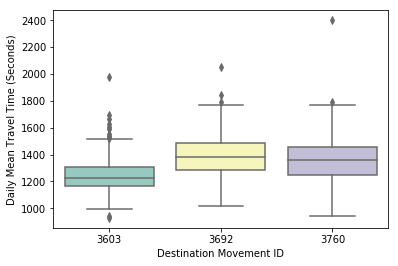

In [60]:
import seaborn as sns 
ax = sns.boxplot(x='Destination Movement ID', y='Daily Mean Travel Time (Seconds)',
                 data=bh_hotspots_3396, palette="Set3")
ax

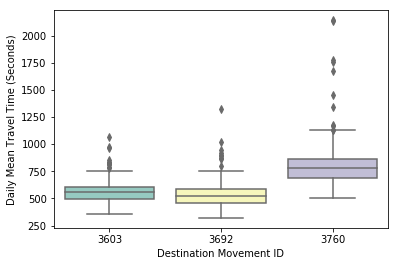

In [61]:
b = make_boxplot(bh_hotspots_3792)
b

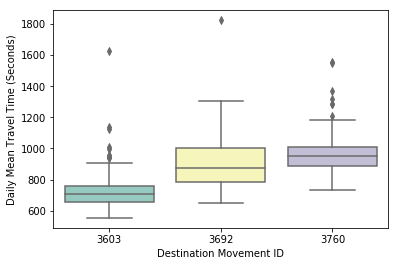

In [62]:
c = make_boxplot(bh_hotspots_3394)
c

In [70]:
week_group = bh_hotspots_3394.groupby(['Destination Movement ID','dow'])['Daily Mean Travel Time (Seconds)'].mean()
bh_hotspots_3394

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),dow
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,732.0,586.0,915.0,795.0,612.0,1032.0,568.0,438.0,736.0,Wednesday
10,06/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,NaN,...,713.0,511.0,996.0,750.0,549.0,1025.0,NaN,NaN,NaN,Saturday
13,05/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,594.0,...,633.0,488.0,820.0,625.0,484.0,807.0,NaN,NaN,NaN,Wednesday
19,05/07/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,643.0,...,800.0,633.0,1012.0,715.0,537.0,952.0,NaN,NaN,NaN,Tuesday
26,04/10/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",790.0,581.0,1076.0,923.0,694.0,...,693.0,583.0,823.0,683.0,516.0,903.0,NaN,NaN,NaN,Wednesday
27,05/09/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",750.0,591.0,952.0,836.0,663.0,...,721.0,576.0,901.0,694.0,528.0,913.0,NaN,NaN,NaN,Thursday
31,06/14/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",831.0,602.0,1148.0,NaN,NaN,...,811.0,653.0,1008.0,671.0,527.0,855.0,NaN,NaN,NaN,Friday
43,06/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",770.0,556.0,1066.0,NaN,NaN,...,658.0,535.0,808.0,666.0,523.0,847.0,NaN,NaN,NaN,Saturday
45,06/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",754.0,586.0,969.0,NaN,NaN,...,751.0,571.0,987.0,750.0,586.0,959.0,NaN,NaN,NaN,Saturday
55,04/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",876.0,605.0,1268.0,963.0,707.0,...,713.0,531.0,957.0,656.0,575.0,747.0,NaN,NaN,NaN,Monday


In [79]:
bh_hotspots_3394_timeofday = bh_hotspots_3394[['Origin Movement ID', 'Origin Display Name', 'Destination Movement ID', 'Destination Display Name', 'Early Morning Mean Travel Time (Seconds)', 'Midday Mean Travel Time (Seconds)', 'Evening Mean Travel Time (Seconds)']]
bh_hotspots_3394_timeofday_test = pd.melt(bh_hotspots_3394_timeofday, id_vars=['Origin Movement ID', 'Origin Display Name', 'Destination Movement ID', 'Destination Display Name'], var_name='time of day', value_name='time')
bh_hotspots_3394_timeofday_test

,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,time of day,time
0,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),568.0
1,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
2,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
3,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
4,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
5,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
6,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
7,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
8,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN
9,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",Early Morning Mean Travel Time (Seconds),NaN


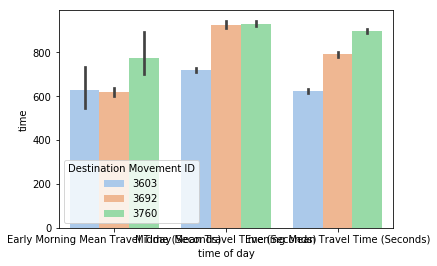

In [90]:
bh_hotspots_tod = sns.barplot(x=bh_hotspots_3394_timeofday_test['time of day'], y=bh_hotspots_3394_timeofday_test["time"], hue=bh_hotspots_3394_timeofday_test["Destination Movement ID"], palette="pastel")

In [91]:
def timeofday(df):
    timeofday_df = df[['Origin Movement ID', 'Origin Display Name', 'Destination Movement ID', 'Destination Display Name', 'Early Morning Mean Travel Time (Seconds)', 'Midday Mean Travel Time (Seconds)', 'Evening Mean Travel Time (Seconds)']]
    timeofday_df_melted = pd.melt(timeofday_df, id_vars=['Origin Movement ID', 'Origin Display Name', 'Destination Movement ID', 'Destination Display Name'], var_name='time of day', value_name='time')
    sns.barplot(x=timeofday_df_melted['time of day'], y=timeofday_df_melted["time"], hue=timeofday_df_melted["Destination Movement ID"], palette="pastel")
    

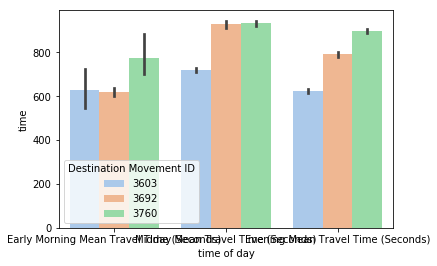

In [92]:

timeofday(bh_hotspots_3394)